In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('T:/Internship/assignments/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [3]:
# Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [4]:
df.isnull().sum() # checking null values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [5]:
df.nunique()# checking for duplication

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
furnishingstatus      3
dtype: int64

In [6]:
print("There are {} missing values in the data.".format(df.isna().sum().sum())) 

There are 0 missing values in the data.


In [7]:
print(f'Number of observation:{df.shape[0]} and features:{df.shape[1]}') 

Number of observation:545 and features:12


In [8]:
df.columns# checking the columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus'],
      dtype='object')

In [9]:
 # descriptive statistics summary
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
df['price'].describe() # target variable descriptive

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

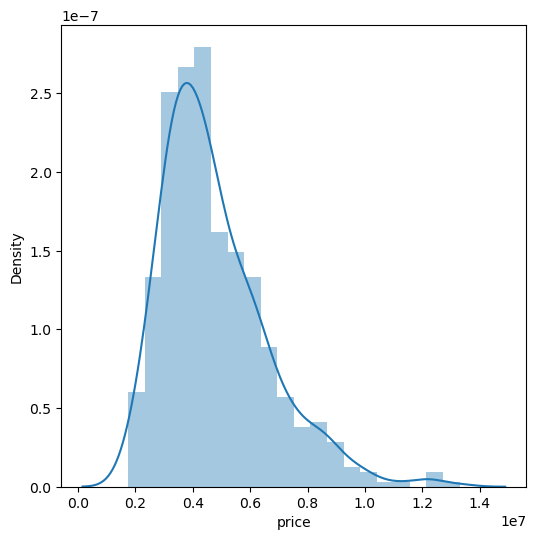

In [11]:
plt.figure(figsize=(6,6))
sns.distplot(df['price'], kde='False', bins=20)# visualize the target variable for better understanding
plt.show()

# finding the outliers

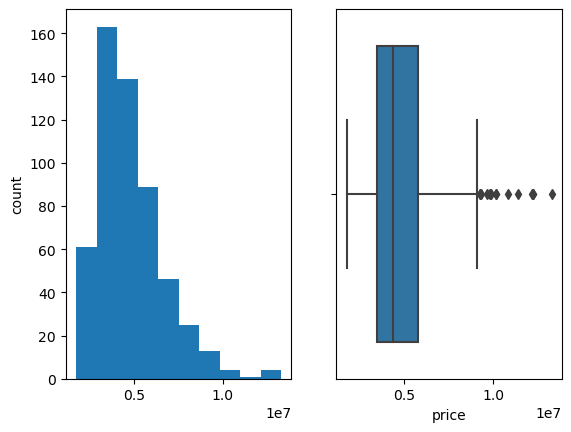

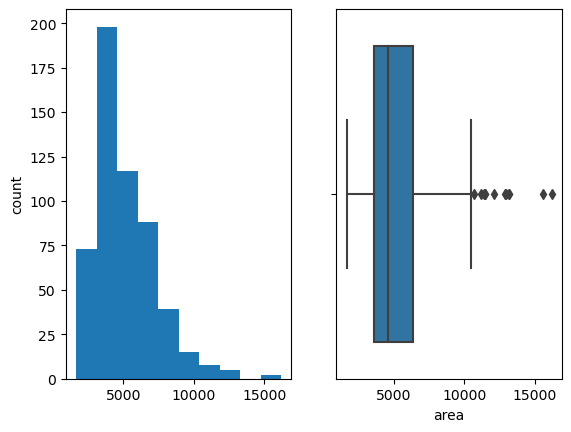

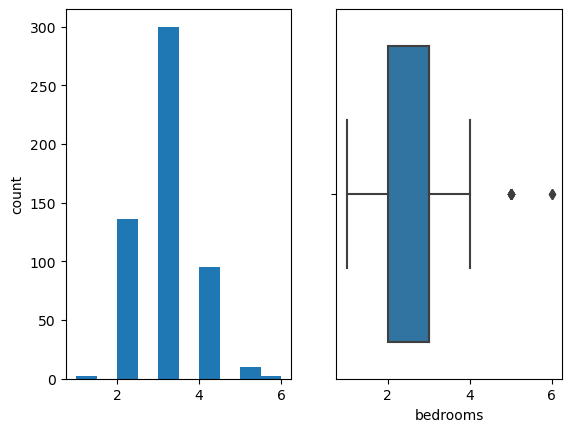

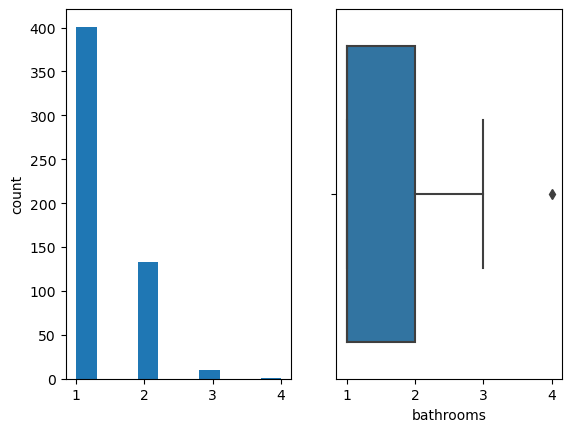

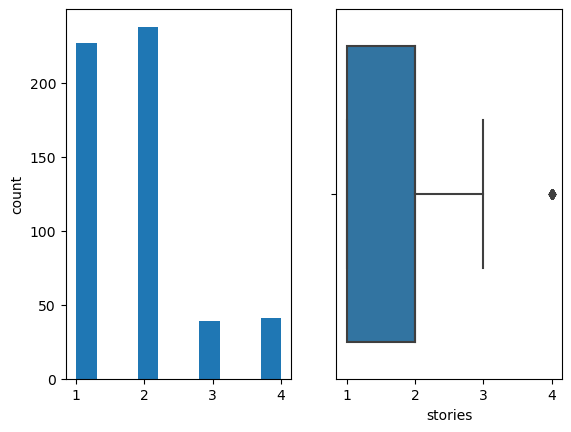

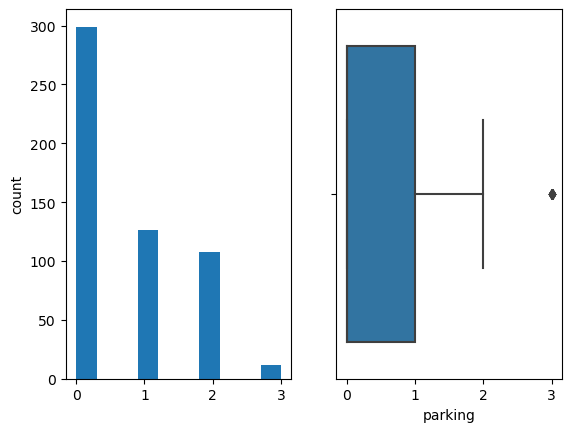

In [12]:
num_cols=df.select_dtypes(exclude='object')# numeric variable
# for numeric column to visualize the data using boxplot and histogram
for col in num_cols:#print(col)
    plt.subplot(1,2,1)
    df[col].hist(grid=False,bins=10)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()
                
            
            
            

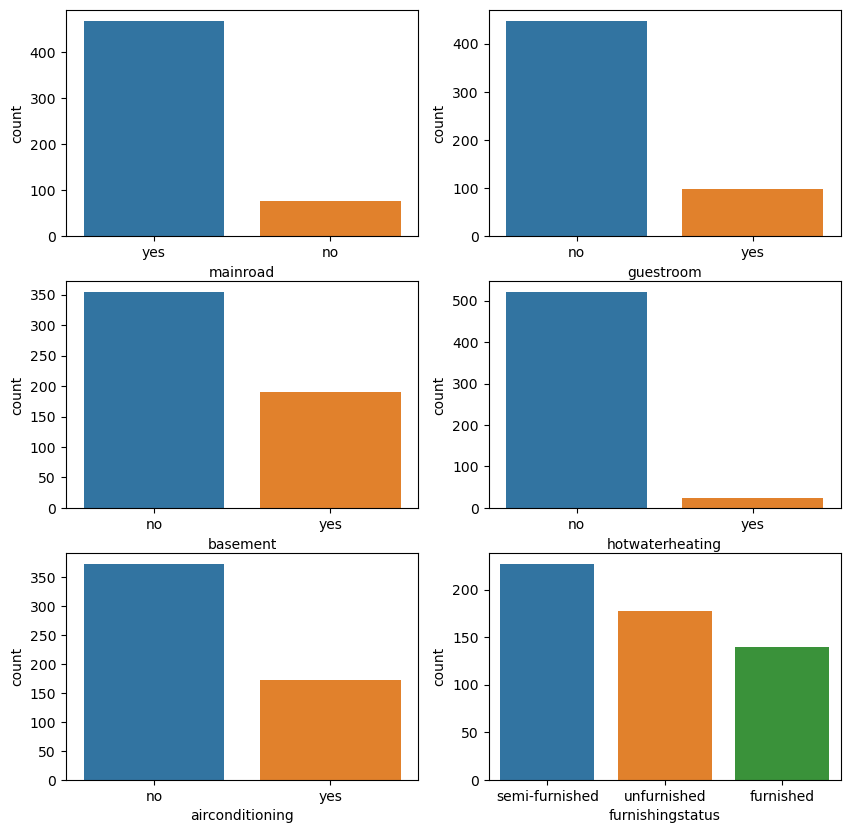

In [13]:
# for categorical column to visualize the data using Count plot
cate_cols = df.select_dtypes(include='object')# categorical variable
fig,axes=plt.subplots(3,2,figsize=(10,10))
sns.countplot(ax =axes[0, 0],x='mainroad',data=df,order=df['mainroad'].value_counts().index)
sns.countplot(ax =axes[0, 1],x='guestroom', data=df, order=df['guestroom'].value_counts().index)
sns.countplot(ax =axes[1, 0],x='basement', data=df, order=df['basement'].value_counts().index)
sns.countplot(ax =axes[1, 1],x='hotwaterheating', data=df, order=df['hotwaterheating'].value_counts().index)
sns.countplot(ax =axes[2, 0],x='airconditioning', data=df, order=df['airconditioning'].value_counts().index)
sns.countplot(ax =axes[2, 1],x='furnishingstatus', data=df, order=df['furnishingstatus'].value_counts().index)
plt.show()
            

IQR value is: 2760.0
LOWER LIMIT:-540.0 and UPPER LIMIT:10500.0


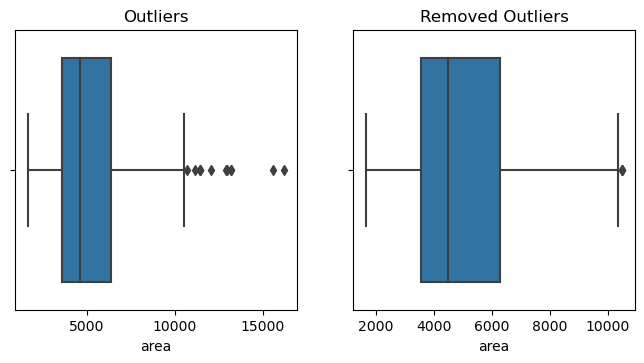

After removed outliers Number of observation:533 and features:12


In [14]:
# to detect outliers IQR
quantile_1 = df['area'].quantile(0.25)
quantile_3 = df['area'].quantile(0.75)
iqr = quantile_3 - quantile_1# formula for IQR
print("IQR value is:", iqr)
lower_bound = quantile_1 - 1.5 * iqr
upper_bound = quantile_3 + 1.5 * iqr
print(f'LOWER LIMIT:{lower_bound} and UPPER LIMIT:{upper_bound}')            
# Dropping & create conditions to isolate the outliers Null values            
outlier_low = df['area'] < lower_bound            
outlier_up = df['area'] > upper_bound           
# checking the len of area and len of outlier up and outlier down
len(df['area']) - (len(df['area'][outlier_low]) + len(df['area'][outlier_up]))
# We removed the outliers and our data rows drop to 533 observations
new_cap = df['area'][~(outlier_low | outlier_up)]
# Compare the plots after capping to visualize the data of outliers
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x=df['area'], orient='h')
plt.title("Outliers")
plt.subplot(2, 2, 2)
sns.boxplot(x=new_cap)
plt.title("Removed Outliers")
plt.show()
df = df[~(outlier_low | outlier_up)]
# After removed outliers
print(f'After removed outliers Number of observation:{df.shape[0]} and features:{df.shape[1]}')
            

In [15]:
# for outliers
# Reference :-https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8

# Analysis

univariate analysis

In [16]:
# Non-Graphical Univariate Analysis
df['price'].value_counts()

4200000     17
3500000     16
4900000     11
5250000      9
3640000      9
            ..
6860000      1
4655000      1
6790000      1
4753000      1
13300000     1
Name: price, Length: 216, dtype: int64

In [17]:
 # Graphical univariate analysis numeric column

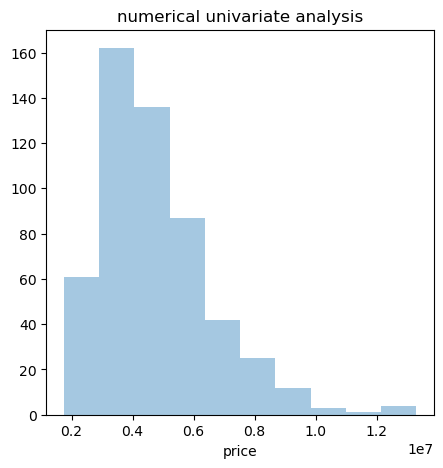

In [18]:
plt.figure(figsize=(5, 5))
sns.distplot(df['price'],kde=False,bins=10)  # checking distribution for target variable
plt.title("numerical univariate analysis")
plt.show()

In [19]:
 # univariate analysis categorical column

In [20]:
fur_name=df['furnishingstatus'].value_counts().index
fur_val=df['furnishingstatus'].value_counts().values
fur_val

array([223, 176, 134], dtype=int64)

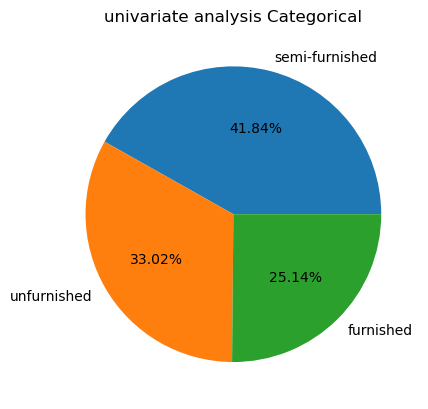

In [21]:
plt.pie(fur_val,labels=fur_name,autopct='%1.2f%%')
plt.title("univariate analysis Categorical")
plt.show()

Bivariate analysis

In [22]:
# Bivariate analysis numeric column

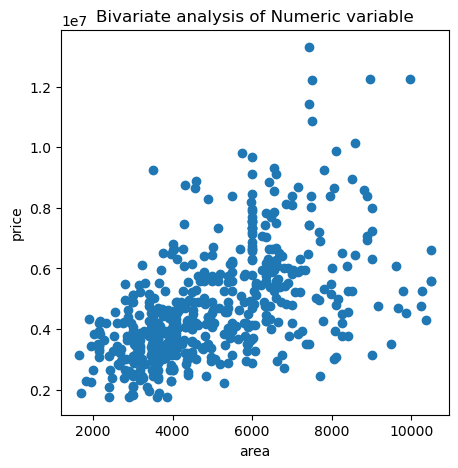

In [23]:
plt.figure(figsize=(5, 5))
plt.scatter(x=df['area'], y=df['price'])  # here i took relation between 2 variable
plt.xlabel("area")
plt.ylabel('price')
plt.title("Bivariate analysis of Numeric variable")
plt.show()

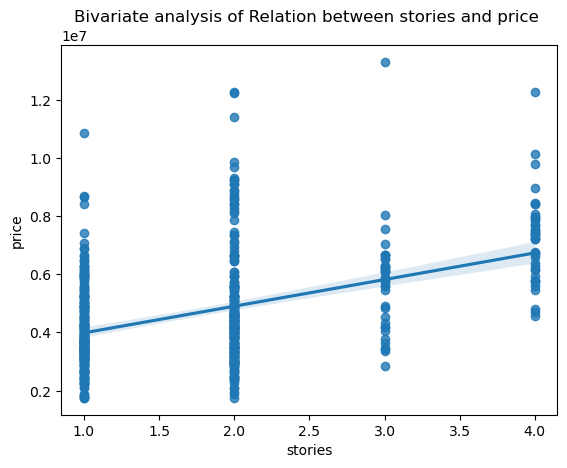

In [24]:
sns.regplot(x='stories', y='price', data=df, scatter=True, fit_reg=True)
plt.title("Bivariate analysis of Relation between stories and price ")
plt.show()

In [25]:
# Bivariate analysis numeric column and categorical finding their relation

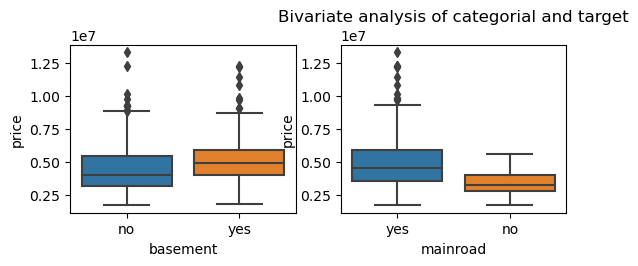

In [26]:
 # Finding the Relation between no of basement and price
plt.subplot(2, 2, 1)
sns.boxplot(x=df['basement'], y=df['price'], data=df)
plt.subplot(2, 2,  2)
sns.boxplot(x=df['mainroad'], y=df['price'], data=df)# Finding the Relation Relation between mainroad and price
plt.title("Bivariate analysis of categorial and target")
plt.show()

In [27]:
# Multi-Variate Analysis

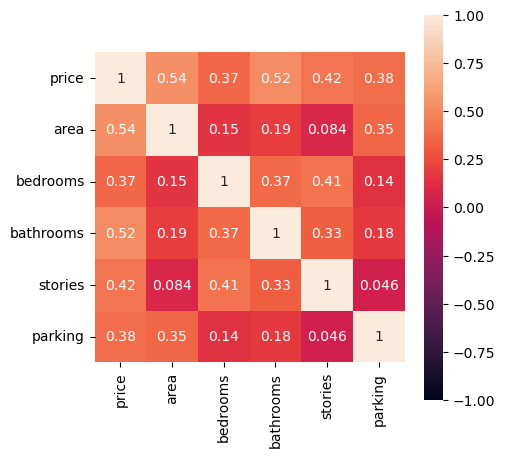

In [28]:
correlation = num_cols.corr()  # finding the positive correlation
plt.figure(figsize=(5, 5))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, square=True)
plt.show()


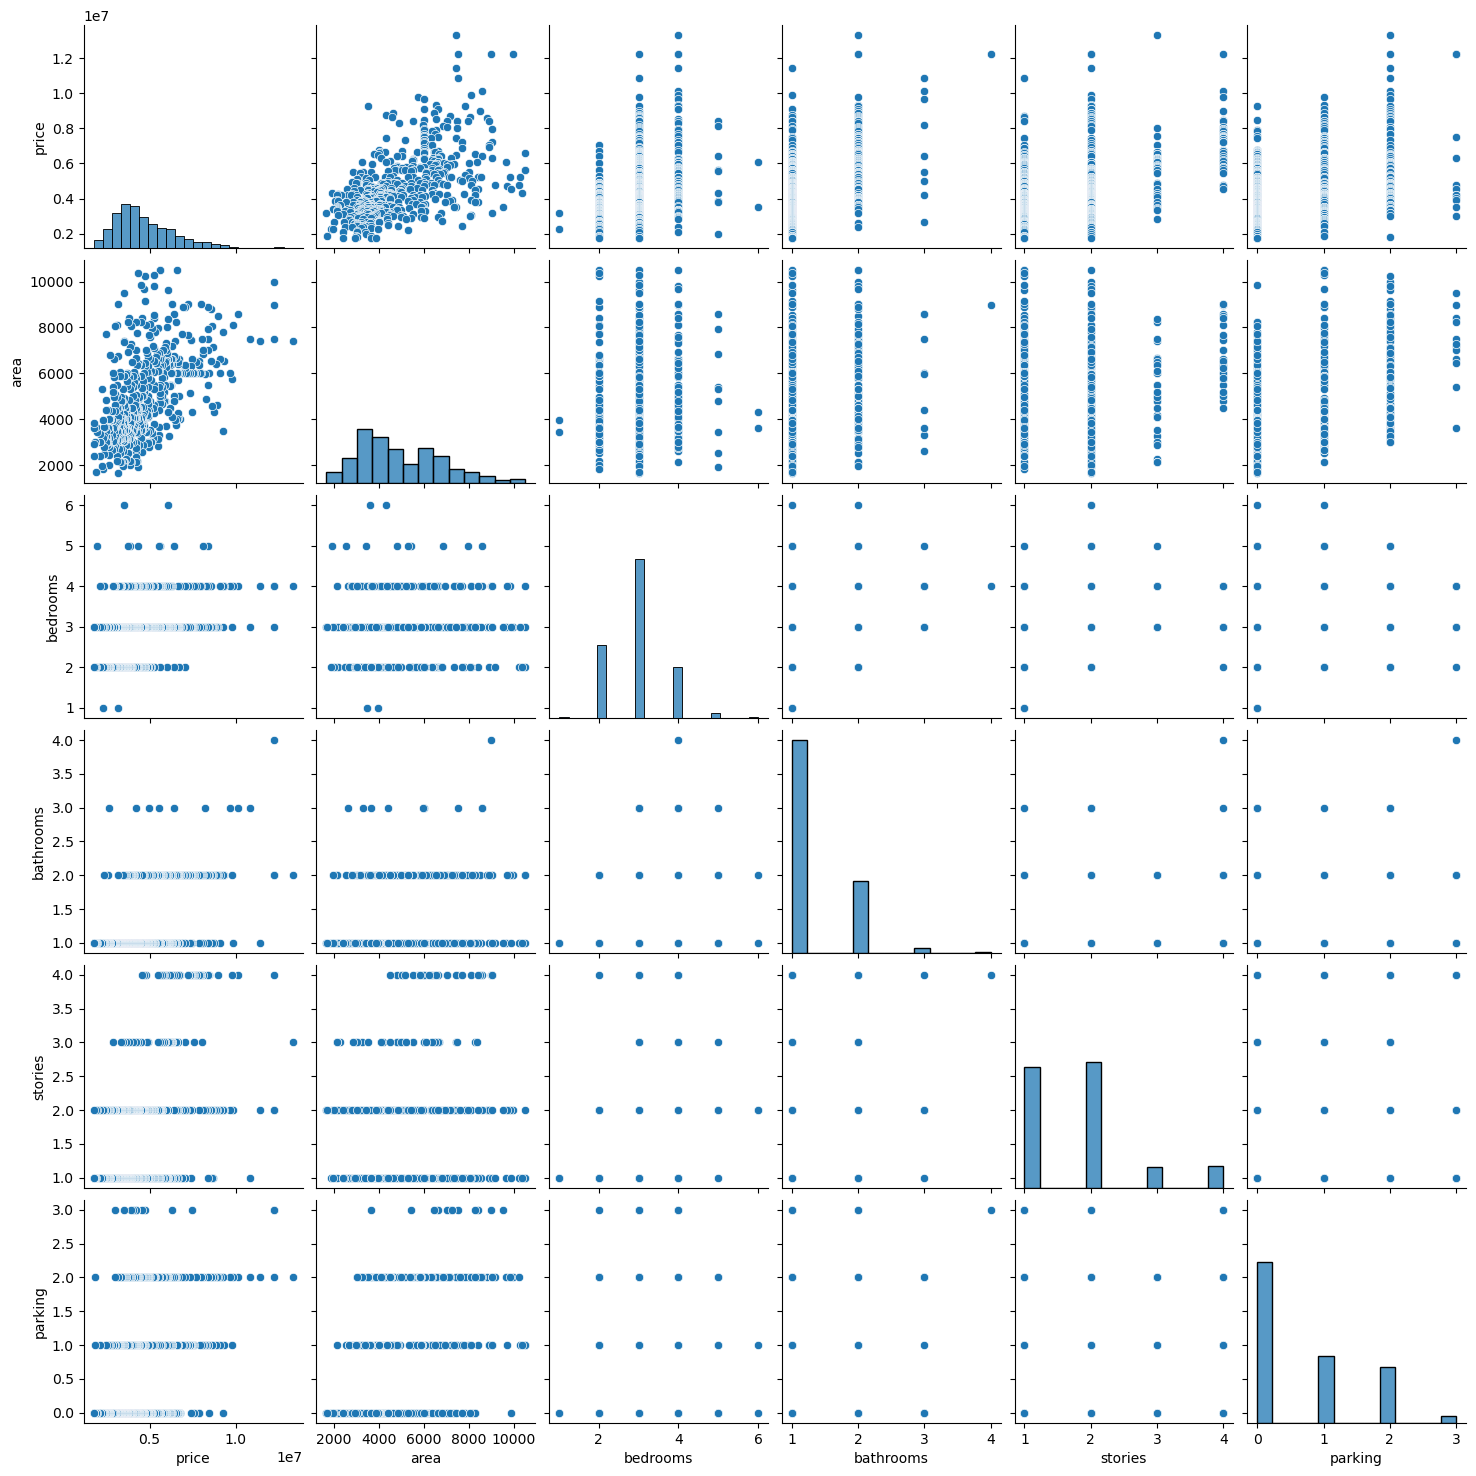

In [29]:
sns.pairplot(data=df)
plt.show()

In [30]:
 # Analyze the distribution and characteristics of individual features (variables)

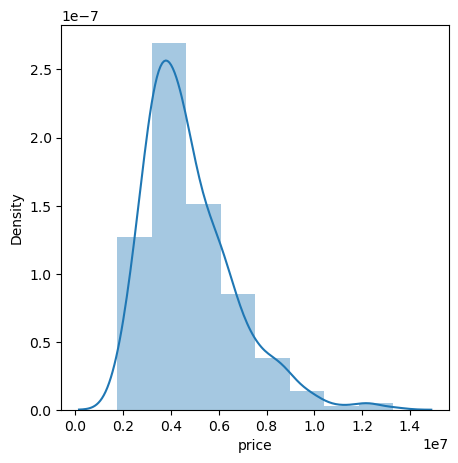

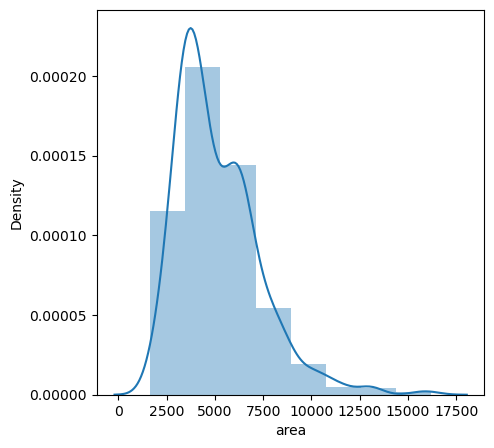

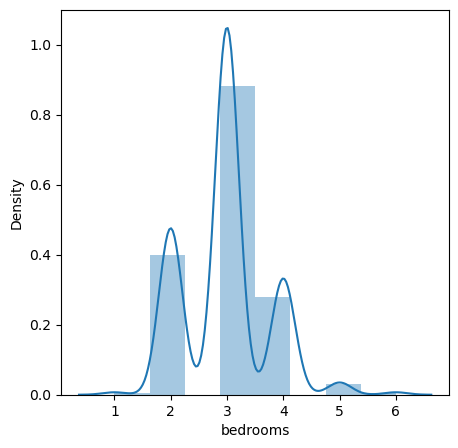

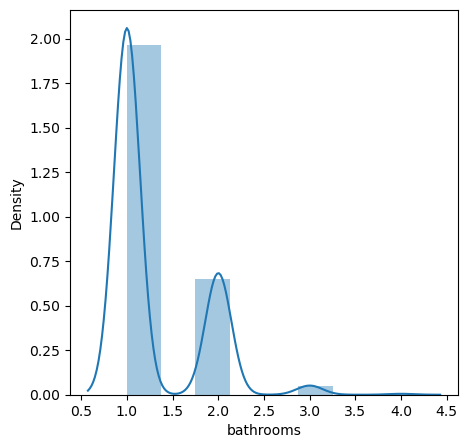

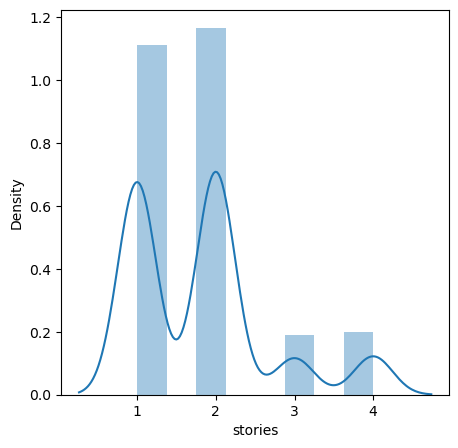

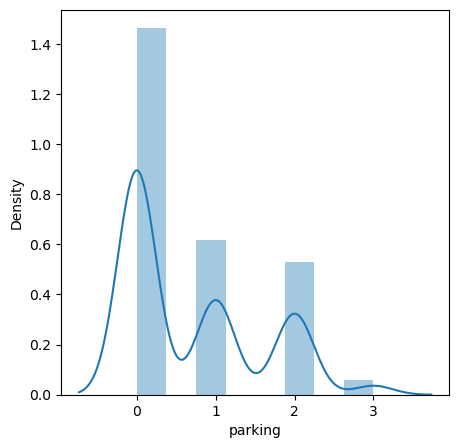

In [31]:
for col in num_cols.columns:
    plt.figure(figsize=(5, 5))
    sns.distplot(num_cols[col], bins=8)
    plt.show()

In [32]:
# finding correlation for numeric datasets

In [33]:
matrix=df.corr()
matrix = matrix.unstack()  # unstack() is  to reshape the given Pandas DataFrame
print(f'highly relative correlation of positive data:{matrix > 0}')
ar = df[['area', 'price']]
cor_1 = ar.corr(method="pearson")  # lets visualize the correlation technique by pearson and spearman
cor_2 = ar.corr(method="spearman")

            

highly relative correlation of positive data:price      price        True
           area         True
           bedrooms     True
           bathrooms    True
           stories      True
           parking      True
area       price        True
           area         True
           bedrooms     True
           bathrooms    True
           stories      True
           parking      True
bedrooms   price        True
           area         True
           bedrooms     True
           bathrooms    True
           stories      True
           parking      True
bathrooms  price        True
           area         True
           bedrooms     True
           bathrooms    True
           stories      True
           parking      True
stories    price        True
           area         True
           bedrooms     True
           bathrooms    True
           stories      True
           parking      True
parking    price        True
           area         True
           bedrooms     Tru

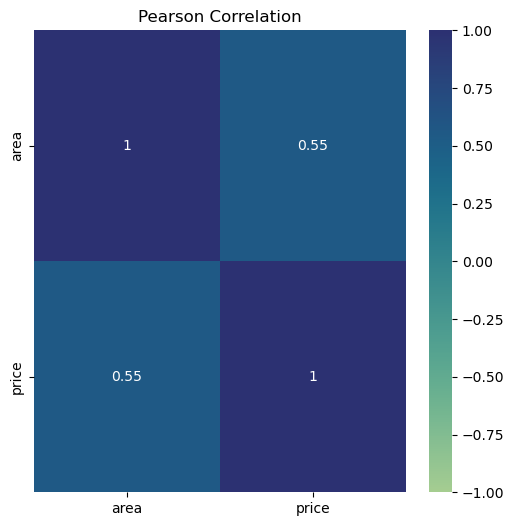

In [34]:
plt.figure(figsize=(6, 6))
sns.heatmap(data=cor_1, annot=True, vmin=-1, vmax=1, center=0, cmap='crest')
plt.title("Pearson Correlation")
plt.show()

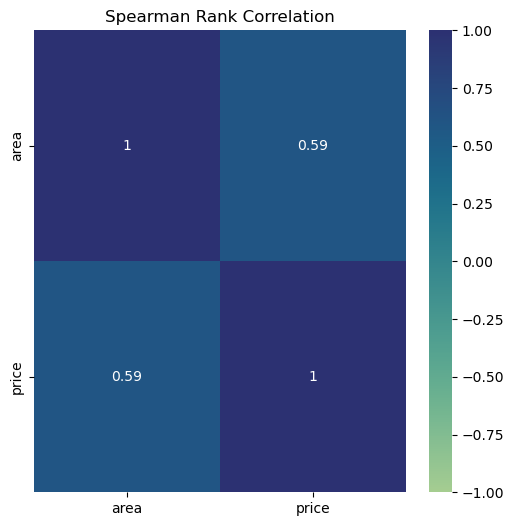

In [35]:
plt.figure(figsize=(6, 6))
sns.heatmap(data=cor_2, annot=True, vmin=-1, vmax=1, center=0, cmap='crest')
plt.title("Spearman Rank Correlation")
plt.show()

In [36]:
# convert categorical to numerical data

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
def value(df,var,sc):
    df[var+'_replaced']=sc.fit_transform(df['mainroad'].values.reshape(-1,1)).astype(int).toarray()

In [39]:
sc=OneHotEncoder(drop='first')
value(df,'mainroad',sc)

In [40]:
value(df,'guestroom',sc)

In [41]:
value(df,'basement',sc)

In [42]:
value(df,'hotwaterheating',sc)

In [43]:
value(df,'airconditioning',sc)


In [44]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,mainroad_replaced,guestroom_replaced,basement_replaced,hotwaterheating_replaced,airconditioning_replaced
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished,1,1,1,1,1
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished,1,1,1,1,1
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished,1,1,1,1,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished,1,1,1,1,1
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,1,1,1,1,1


In [45]:
a = pd.get_dummies(df['furnishingstatus'])
a

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [46]:
df=pd.concat([df,a],axis=1)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,mainroad_replaced,guestroom_replaced,basement_replaced,hotwaterheating_replaced,airconditioning_replaced,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished,1,1,1,1,1,1,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished,1,1,1,1,1,1,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished,1,1,1,1,1,0,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished,1,1,1,1,1,1,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished,1,1,1,1,1,0,0,1
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished,1,1,1,1,1,0,0,1
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished,0,0,0,0,0,1,0,0


In [47]:
df=df.drop(['furnishingstatus','mainroad','guestroom','basement','hotwaterheating','airconditioning'],axis=1)


In [48]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_replaced', 'guestroom_replaced', 'basement_replaced',
       'hotwaterheating_replaced', 'airconditioning_replaced', 'furnished',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [49]:
df.dtypes# checking data types

price                       int64
area                        int64
bedrooms                    int64
bathrooms                   int64
stories                     int64
parking                     int64
mainroad_replaced           int32
guestroom_replaced          int32
basement_replaced           int32
hotwaterheating_replaced    int32
airconditioning_replaced    int32
furnished                   uint8
semi-furnished              uint8
unfurnished                 uint8
dtype: object

In [55]:
 # split the data using iloc function
x = df.iloc[:,1:]
y = df.iloc[:,0]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
# train the model data
reg =LinearRegression()
reg.fit(x_train, y_train)
print(f"coefficent :{reg.coef_}and intercept:{reg.intercept_}")
            

coefficent :[ 3.69510024e+02  1.58955821e+05  1.05451016e+06  5.20502201e+05
  1.89379770e+05  1.03376931e+05  1.03376931e+05  1.03376931e+05
  1.03376931e+05  1.03376931e+05  1.80621057e+05  1.00242420e+05
 -2.80863477e+05]and intercept:-477139.3687595874


In [59]:
from sklearn.metrics import r2_score

In [60]:
# inference of training data
y_train_prediction = reg.predict(x_train)         

In [61]:
training_data=pd.DataFrame({'Y_train':y_train,'y_train_prediction':y_train_prediction})
training_data

,Y_train,y_train_prediction
309,4130000,4.582896e+06
415,3395000,4.750234e+06
459,3115000,2.945091e+06
322,4025000,4.794641e+06
148,5600000,5.582956e+06
...,...,...
77,6650000,6.769576e+06
112,6083000,5.913019e+06
281,4270000,4.154845e+06
447,3150000,2.809312e+06


In [62]:
print(f'training accuracy of model:{r2_score(y_train, y_train_prediction)}')

training accuracy of model:0.5910419482023388


In [63]:
 # inference of testing data
y_test_prediction = reg.predict(x_test)


In [64]:
testing_data=pd.DataFrame({'Y_test':y_test,'y_test_prediction':y_test_prediction})
testing_data

,Y_test,y_test_prediction
6,10150000,9.570506e+06
501,2660000,2.191786e+06
110,6090000,5.009393e+06
499,2660000,5.264721e+06
460,3087000,4.834217e+06
...,...,...
184,5110000,4.955789e+06
315,4095000,4.102168e+06
544,1750000,3.753877e+06
392,3500000,4.186715e+06


In [65]:
print(f'testing accuracy of model:{r2_score(y_test, y_test_prediction)}')


testing accuracy of model:0.5642826337561158


In [66]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_replaced,guestroom_replaced,basement_replaced,hotwaterheating_replaced,airconditioning_replaced,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,2,1,1,1,1,1,1,0,0
1,12250000,8960,4,4,4,3,1,1,1,1,1,1,0,0
2,12250000,9960,3,2,2,2,1,1,1,1,1,0,1,0
3,12215000,7500,4,2,2,3,1,1,1,1,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,1,1,1,0,0


In [67]:
print(f'prediction for House :{reg.predict([[7420,4,2,3,2,1,1,1,1,1,1,0,0]])}')

prediction for House :[7647240.46163669]
